In [99]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [101]:
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [102]:
test.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

In [105]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


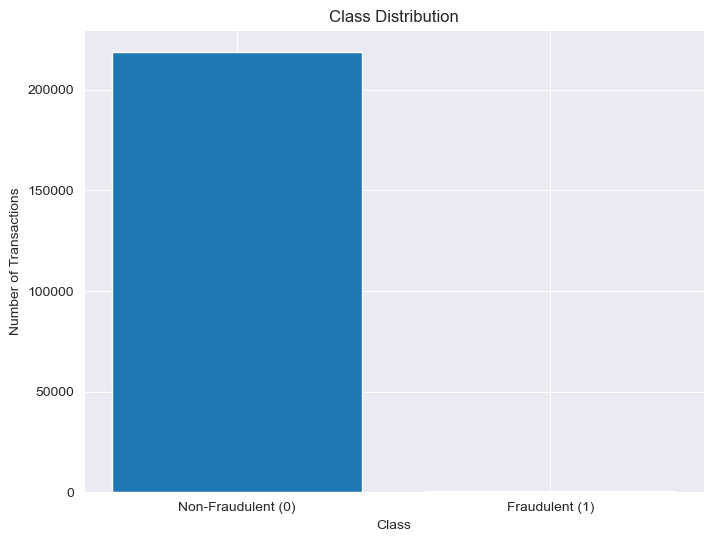

Class
0    218660
1       469
Name: count, dtype: int64

In [106]:
class_distribution = train['Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Class Distribution')
plt.show()

class_distribution

In [107]:
def manual_oversampling(X, y):
    class_counts = y.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    indices_majority = y[y == majority_class].index
    indices_minority = y[y == minority_class].index

    new_instances_count = len(indices_majority) - len(indices_minority)

    random_indices = np.random.choice(indices_minority, new_instances_count, replace=True)

    over_sample_indices = np.concatenate([indices_majority, random_indices])

    X_resampled = X.loc[over_sample_indices]
    y_resampled = y.loc[over_sample_indices]

    return X_resampled, y_resampled

In [108]:
X = train.drop(['Class'], axis=1)
y = train['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_oversampled, y_oversampled = manual_oversampling(X_train, y_train)

y_oversampled.value_counts()

Class
0    174928
1    174553
Name: count, dtype: int64

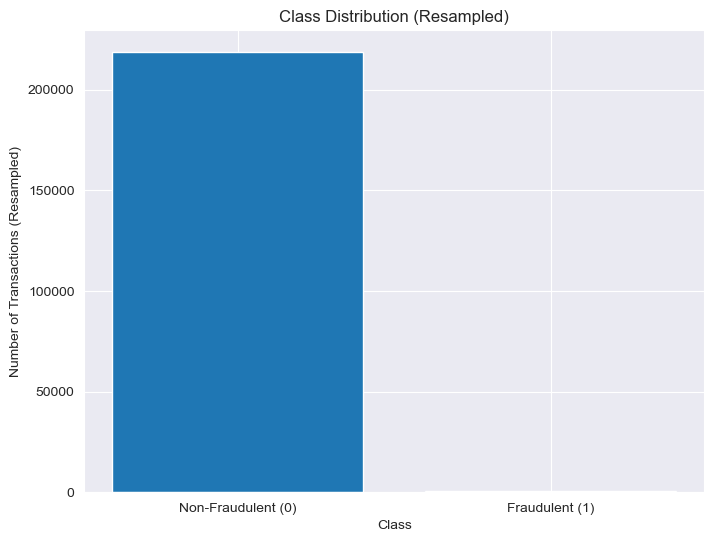

Class
0    174928
1    174553
Name: count, dtype: int64

In [109]:
over_class_distribution = y_oversampled.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions (Resampled)')
plt.title('Class Distribution (Resampled)')
plt.show()

over_class_distribution

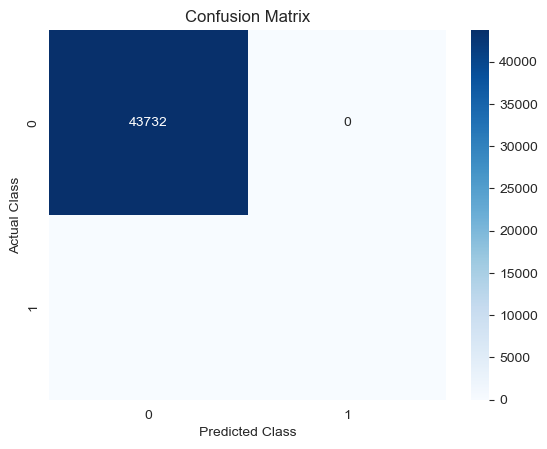

Oversampled Random Forest Classification Report
                precision    recall  f1-score   support

Non-Fraudulent       1.00      1.00      1.00     43732
    Fraudulent       0.00      0.00      0.00        94

      accuracy                           1.00     43826
     macro avg       0.50      0.50      0.50     43826
  weighted avg       1.00      1.00      1.00     43826


In [110]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_oversampled, y_oversampled)

y_val_pred = rf.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_val_pred)

class_report = classification_report(y_val, y_val_pred, target_names=['Non-Fraudulent', 'Fraudulent'])
title = "Oversampled Random Forest Classification Report"
formatted_report = f"{title}\n{'=' * len(title)}\n{class_report}"


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()
print(formatted_report)

In [111]:
def entropy(target_col):
    value_counts = target_col.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts))

def bag_predict(row, tree, default_class=0): 
    while isinstance(tree, dict):
        feature = next(iter(tree))
        value = row[feature]
        if value in tree[feature]:
            tree = tree[feature][value]
        else:
            return default_class
    return tree 


def get_majority_class(tree, feature):
    if not isinstance(tree, pd.DataFrame):
        tree = pd.DataFrame(tree)
    if feature in tree.columns:
        return tree[feature].value_counts().idxmax()
    return None

def majority_error(target_col):
    value_counts = target_col.value_counts(normalize=True)
    return 1 - np.max(value_counts)

def gini_index(target_col):
    counts = target_col.value_counts()
    probabilities = counts / len(target_col)
    return 1 - np.sum(probabilities**2)

def info_gain(data, split_attribute_name, target_name, criterion="entropy"):
    criterion_map = {
        "entropy": entropy,
        "majority_error": majority_error,
        "gini_index": gini_index
    }
    if criterion not in criterion_map:
        raise ValueError("Invalid criterion provided")

    total_impurity = criterion_map[criterion](data[target_name])

    weighted_impurity = 0
    for value, group in data.groupby(split_attribute_name):
        weighted_impurity += (len(group) / len(data)) * criterion_map[criterion](group[target_name])

    return total_impurity - weighted_impurity

def ID3_numeric(data, original_data, features, target_attribute_name="Class", parent_node_class=None,
                max_depth=None, depth=0, criterion="entropy"):
    unique_targets = np.unique(data[target_attribute_name])
    if len(unique_targets) == 1:
        return unique_targets[0]

    if len(data) == 0:
        return get_majority_class(original_data, target_attribute_name)

    if len(features) == 0 or (max_depth and depth == max_depth):
        return parent_node_class

    parent_node_class = get_majority_class(data, target_attribute_name)

    gains = [info_gain(data, feature, target_attribute_name, criterion) for feature in features]
    best_feature = features[np.argmax(gains)]

    tree = {best_feature: {}}

    for value in np.unique(data[best_feature]):
        best_val = data[best_feature] == value
        sub_data = data.where(best_val).dropna()
        remaining_features = [feat for feat in features if feat != best_feature]
        subtree = ID3_numeric(
            data=sub_data,
            original_data=original_data,
            features=remaining_features,
            target_attribute_name=target_attribute_name,
            parent_node_class=parent_node_class,
            max_depth=max_depth,
            depth=depth + 1,
            criterion=criterion
        )
        tree[best_feature][value] = subtree

    return tree

num_bins = 10  
binned_X_oversampled = pd.DataFrame()
for col in X_oversampled.columns:
    binned_X_oversampled[col] = pd.cut(X_oversampled[col], bins=num_bins, labels=False)

y_resampled_int = y_oversampled.astype(int)

id3_data = pd.concat([binned_X_oversampled, y_resampled_int], axis=1)

id3_tree = ID3_numeric(
    data=id3_data,
    original_data=id3_data,
    features=binned_X_oversampled.columns.tolist(),
    target_attribute_name="Class",
    max_depth=5  
)

binned_X_val = pd.DataFrame()
for col in X_val.columns:
    binned_X_val[col] = pd.cut(X_val[col], bins=num_bins, labels=False)

predictions = binned_X_val.apply(lambda row: bag_predict(row, id3_tree, default_class=0), axis=1)


In [112]:
predictions_oversampled = binned_X_oversampled.apply(lambda row: bag_predict(row, id3_tree, default_class=0), axis=1)

class_report_oversampled = classification_report(y_oversampled, predictions_oversampled, target_names=['Non-Fraudulent', 'Fraudulent'])

title = "Manual Oversampled Data Classification Report"
formatted_report = f"{title}\n{'=' * len(title)}\n{class_report_oversampled}"

print(formatted_report)

Manual Oversampled Data Classification Report
                precision    recall  f1-score   support

Non-Fraudulent       0.79      0.85      0.82    174928
    Fraudulent       0.84      0.77      0.80    174553

      accuracy                           0.81    349481
     macro avg       0.81      0.81      0.81    349481
  weighted avg       0.81      0.81      0.81    349481


## Under-sampling Implementation 

In [113]:
def manual_undersampling(X, y):
    class_counts = y.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    indices_majority = y[y == majority_class].index
    indices_minority = y[y == minority_class].index

    undersampled_count = len(indices_minority)

    random_indices = np.random.choice(indices_majority, undersampled_count, replace=False)

    under_sample_indices = np.concatenate([indices_minority, random_indices])

    X_resampled = X.loc[under_sample_indices]
    y_resampled = y.loc[under_sample_indices]

    return X_resampled, y_resampled

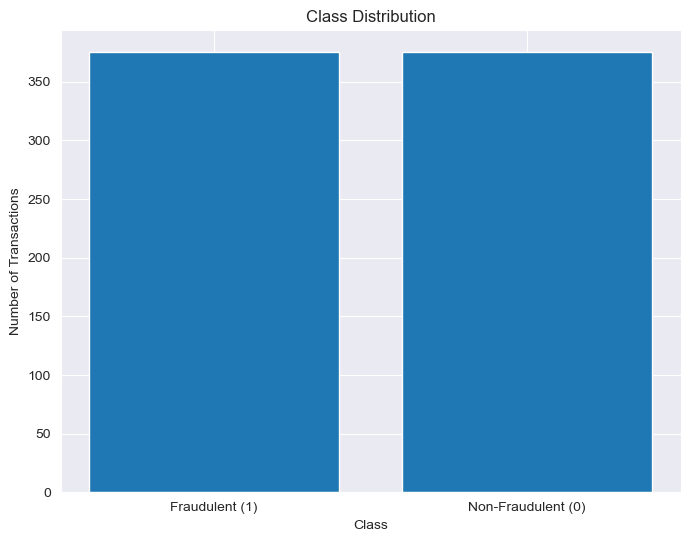

Class
1    375
0    375
Name: count, dtype: int64

In [114]:
X_undersampled, y_undersampled = manual_undersampling(X_train, y_train)
y_undersampled.value_counts()
under_class_distribution = y_undersampled.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(under_class_distribution.index, under_class_distribution.values, tick_label=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Class Distribution')
plt.show()

under_class_distribution

Undersampled Random Forest Classification Report
                precision    recall  f1-score   support

Non-Fraudulent       1.00      0.78      0.88     43732
    Fraudulent       0.01      0.68      0.01        94

      accuracy                           0.78     43826
     macro avg       0.50      0.73      0.44     43826
  weighted avg       1.00      0.78      0.87     43826


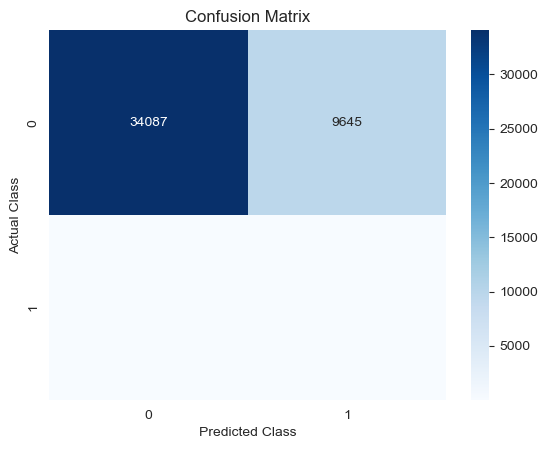

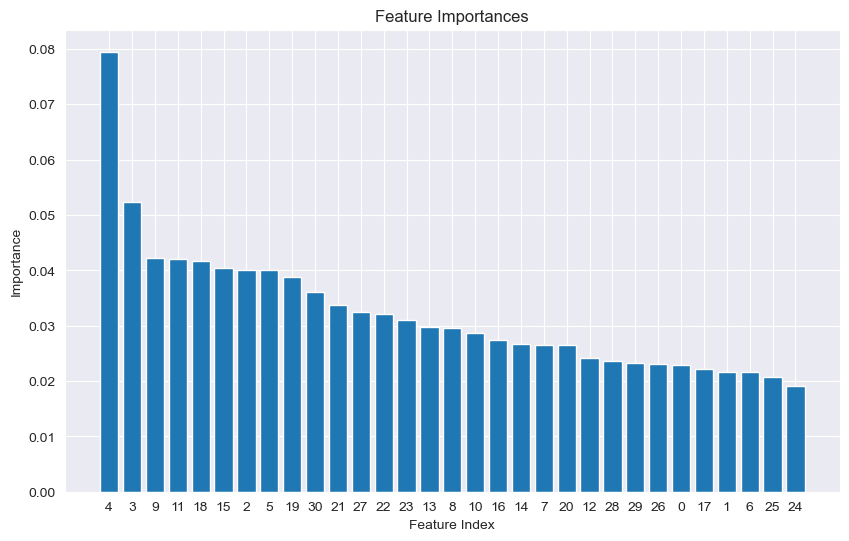

In [115]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_undersampled, y_undersampled)

y_val_pred = rf.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred, target_names=['Non-Fraudulent', 'Fraudulent'])
title = "Undersampled Random Forest Classification Report"
formatted_report = f"{title}\n{'=' * len(title)}\n{class_report}"
print(formatted_report)
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), sorted_indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [116]:
def entropy(target_col):
    value_counts = target_col.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts))

def bag_predict(row, tree, default_class=0): 
    while isinstance(tree, dict):
        feature = next(iter(tree))
        value = row[feature]
        if value in tree[feature]:
            tree = tree[feature][value]
        else:
            return default_class
    return tree  


def get_majority_class(tree, feature):
    if not isinstance(tree, pd.DataFrame):
        tree = pd.DataFrame(tree)
    if feature in tree.columns:
        return tree[feature].value_counts().idxmax()
    return None

def majority_error(target_col):
    value_counts = target_col.value_counts(normalize=True)
    return 1 - np.max(value_counts)

def gini_index(target_col):
    counts = target_col.value_counts()
    probabilities = counts / len(target_col)
    return 1 - np.sum(probabilities**2)

def info_gain(data, split_attribute_name, target_name, criterion="entropy"):
    criterion_map = {
        "entropy": entropy,
        "majority_error": majority_error,
        "gini_index": gini_index
    }
    if criterion not in criterion_map:
        raise ValueError("Invalid criterion provided")

    total_impurity = criterion_map[criterion](data[target_name])

    weighted_impurity = 0
    for value, group in data.groupby(split_attribute_name):
        weighted_impurity += (len(group) / len(data)) * criterion_map[criterion](group[target_name])

    return total_impurity - weighted_impurity

def ID3_numeric(data, original_data, features, target_attribute_name="Class", parent_node_class=None,
                max_depth=None, depth=0, criterion="entropy"):
    unique_targets = np.unique(data[target_attribute_name])
    if len(unique_targets) == 1:
        return unique_targets[0]

    if len(data) == 0:
        return get_majority_class(original_data, target_attribute_name)

    if len(features) == 0 or (max_depth and depth == max_depth):
        return parent_node_class

    parent_node_class = get_majority_class(data, target_attribute_name)

    gains = [info_gain(data, feature, target_attribute_name, criterion) for feature in features]
    best_feature = features[np.argmax(gains)]

    tree = {best_feature: {}}

    for value in np.unique(data[best_feature]):
        best_val = data[best_feature] == value
        sub_data = data.where(best_val).dropna()
        remaining_features = [feat for feat in features if feat != best_feature]
        subtree = ID3_numeric(
            data=sub_data,
            original_data=original_data,
            features=remaining_features,
            target_attribute_name=target_attribute_name,
            parent_node_class=parent_node_class,
            max_depth=max_depth,
            depth=depth + 1,
            criterion=criterion
        )
        tree[best_feature][value] = subtree

    return tree

num_bins = 10  
binned_X_oversampled = pd.DataFrame()
for col in X_undersampled.columns:
    binned_X_oversampled[col] = pd.cut(X_undersampled[col], bins=num_bins, labels=False)

y_resampled_int = y_undersampled.astype(int)

id3_data = pd.concat([binned_X_oversampled, y_resampled_int], axis=1)

id3_tree = ID3_numeric(
    data=id3_data,
    original_data=id3_data,
    features=binned_X_oversampled.columns.tolist(),
    target_attribute_name="Class",
    max_depth=5  
)

In [117]:
binned_X_undersampled = pd.DataFrame()
for col in X_undersampled.columns:
    binned_X_undersampled[col] = pd.cut(X_undersampled[col], bins=num_bins, labels=False)

predictions_undersampled = binned_X_undersampled.apply(lambda row: bag_predict(row, id3_tree, default_class=0), axis=1)

class_report_undersampled = classification_report(y_undersampled, predictions_undersampled, target_names=['Non-Fraudulent', 'Fraudulent'])

title = "Manual Undersampled Data Classification Report"
formatted_report = f"{title}\n{'=' * len(title)}\n{class_report_undersampled}"
print(formatted_report)

Manual Undersampled Data Classification Report
                precision    recall  f1-score   support

Non-Fraudulent       0.95      0.99      0.97       375
    Fraudulent       0.99      0.94      0.97       375

      accuracy                           0.97       750
     macro avg       0.97      0.97      0.97       750
  weighted avg       0.97      0.97      0.97       750
